## Import libraries and load Boston Dataset

In [73]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Import boston dataset from sklearn library
from sklearn.datasets import load_boston
boston_data = load_boston()

## Check the keys of Boston Dataset

In [74]:
# Check the indexes of the dataset
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## Check some data of Boston Dataset

In [75]:
# Print data to understand
boston_data.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

## Features of the Boston Dataset

In [76]:
# Print the features of the dataset
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Dataset with all features

In [77]:
# Create a dataframe

boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Updated Dataset with target column

In [78]:
# Add target to the dataframe
boston['target'] = boston_data.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Check for the Null values in data

In [79]:
# check if there are any null values in the data
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

## Distplot of target column

<AxesSubplot:xlabel='target', ylabel='Density'>

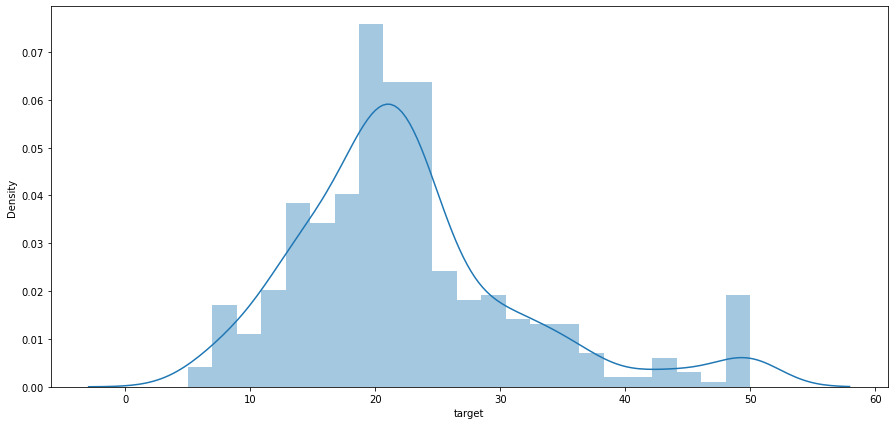

In [80]:
# plot the target column
plt.figure(figsize=(15,7))
sns.distplot(boston['target'])

## Check for the Correlation between all the columns.
### Find the most affected columns to target column

<AxesSubplot:>

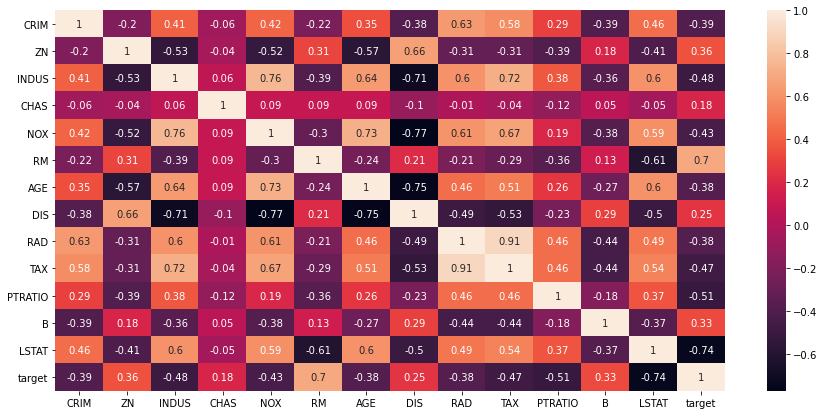

In [81]:
# check for the correlation

plt.figure(figsize=(15,7))
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# RM and LSTAT are highly correlated to the target column.. positivly and negatively.. 
# So, we choose those two columns for our regression.

## Show scatterplot of both LSTAT & RM with target

Text(0.5, 0, 'RM')

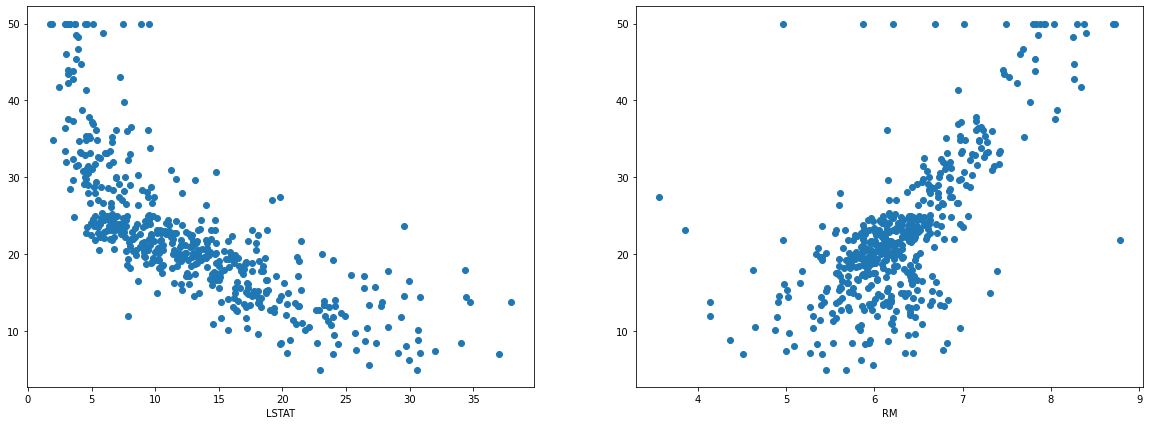

In [82]:
# Plot scatterplot of all the columns to target column

fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(boston['LSTAT'],boston['target'])
ax1.set_xlabel('LSTAT')
ax2.scatter(boston['RM'],boston['target'])
ax2.set_xlabel('RM')

# Price decreases as LSTAT increases
# Price increases as RM decreases

## Contact both the columns in new dataset to train the model.

In [83]:
# contact both the columns and store it in new variable. We can do it in both the ways as shown below.
X = pd.concat([boston['LSTAT'], boston['RM']], axis=1)
#X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])

Y = boston['target']

X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


## Split the whole dataset into train and test datasets.

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## Import Linear Regression, Lasso & Ridge.
## Train all the models with data

In [85]:
# import all the libraries
# using Linear, Lasso & Ridge regression

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_model = linear_regressor.fit(X_train,Y_train)

from sklearn.linear_model import Lasso
lasso_regressor = Lasso()
lasso_model = lasso_regressor.fit(X_train,Y_train)

from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_model = ridge_regressor.fit(X_train,Y_train)

## Predicted data of all the algorithms.
### Compare predicated data with real data

In [86]:
# Print all the predicted data and compare it with the real data

linear_y_train_predict = linear_model.predict(X_train)
lasso_y_train_predict = lasso_model.predict(X_train)
ridge_y_train_predict = ridge_model.predict(X_train)

print("Linear :",linear_y_train_predict[0:5])
print("Lasso  :",lasso_y_train_predict[0:5])
print("Ridge  :",ridge_y_train_predict[0:5])

print("\nReal Data: \n\t",list(Y_train[0:5]))
print("\nAccuracy of Linear model :",round(100*linear_model.score(X_train,Y_train)),"%")
print("Accuracy of Lasso model  :",round(100*lasso_model.score(X_train,Y_train)),"%")
print("Accuracy of Ridge model  :",round(100*ridge_model.score(X_train,Y_train)),"%")

Linear : [28.03819049 21.56820411 13.49955915 25.98645034 25.04515699]
Lasso  : [28.108896   21.95253209 12.97157237 22.02669405 25.40338932]
Ridge  : [28.04058787 21.57340791 13.48960403 25.93061735 25.05089173]

Real Data: 
	 [28.4, 29.6, 10.8, 17.8, 28.1]

Accuracy of Linear model : 62 %
Accuracy of Lasso model  : 59 %
Accuracy of Ridge model  : 62 %


## Import different Evaluation Metrics

In [87]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
# Mean Square Error
from sklearn.metrics import mean_squared_error
# R2_SCORE
from sklearn.metrics import r2_score

## Check Errors with MAE, MSE, RMSE for "Linear Regression"

In [88]:
# For linear model

# Training Dataset
linear_mae = mean_absolute_error(Y_train,linear_y_train_predict)
linear_mse = mean_squared_error(Y_train,linear_y_train_predict)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(Y_train,linear_y_train_predict)

print("********** Linear Algorithm ***********")
print("\nFor Training Dataset:")
print("\tMAE: ",linear_mae)
print("\tMSE: ",linear_mse)
print("\tRMSE:",linear_rmse)
print("\tR2_score:",linear_r2)


# Test Dataset
linear_y_test_predict = linear_model.predict(X_test)

p_linear_mae = mean_absolute_error(Y_test,linear_y_test_predict)
p_linear_mse = mean_squared_error(Y_test,linear_y_test_predict)
p_linear_rmse = np.sqrt(p_linear_mse)
p_linear_r2 = r2_score(Y_test,linear_y_test_predict)

print("\nFor Test Dataset:")
print("\tMAE: ",p_linear_mae)
print("\tMSE: ",p_linear_mse)
print("\tRMSE:",p_linear_rmse)
print("\tR2_score:",p_linear_r2)

********** Linear Algorithm ***********

For Training Dataset:
	MAE:  4.123299010137906
	MSE:  33.28878171035856
	RMSE: 5.769643118110388
	R2_score: 0.6240533346449835

For Test Dataset:
	MAE:  3.2522987894163355
	MSE:  19.70306791688764
	RMSE: 4.438813796149557
	R2_score: 0.7078119198987282


## Check Errors with MAE, MSE, RMSE for "Lasso"

In [89]:
# For Lasso Model

# Training Dataset
lasso_mae = mean_absolute_error(Y_train,lasso_y_train_predict)
lasso_mse = mean_squared_error(Y_train,lasso_y_train_predict)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(Y_train,lasso_y_train_predict)

print("********** Lasso Algorithm ***********")
print("\nFor Training Dataset: ")
print("\tMAE: ",lasso_mae)
print("\tMSE: ",lasso_mse)
print("\tRMSE:",lasso_rmse)
print("\tR2_score:",lasso_r2)


# Test Dataset
lasso_y_test_predict = lasso_model.predict(X_test)

p_lasso_mae = mean_absolute_error(Y_test,lasso_y_test_predict)
p_lasso_mse = mean_squared_error(Y_test,lasso_y_test_predict)
p_lasso_rmse = np.sqrt(p_lasso_mse)
p_lasso_r2 = r2_score(Y_test,lasso_y_test_predict)

print("\nFor Test Dataset: ")
print("\tMAE: ",p_lasso_mae)
print("\tMSE: ",p_lasso_mse)
print("\tRMSE:",p_lasso_rmse)
print("\tR2_score:",p_lasso_r2,":")

********** Lasso Algorithm ***********

For Training Dataset: 
	MAE:  4.410837166922177
	MSE:  36.12867777496837
	RMSE: 6.010713582842587
	R2_score: 0.5919809847243895

For Test Dataset: 
	MAE:  3.3951750715782656
	MSE:  20.344918492479582
	RMSE: 4.51053416930629
	R2_score: 0.6982935500598177 :


## Check Errors with MAE, MSE, RMSE for "Ridge"

In [90]:
# For Ridge model

# Training Dataset
ridge_mae = mean_absolute_error(Y_train,ridge_y_train_predict)
ridge_mse = mean_squared_error(Y_train,ridge_y_train_predict)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_train,ridge_y_train_predict)

print("********** Ridge Algorithm ***********")
print("\nFor Training Dataset:")
print("\tMAE: ",ridge_mae)
print("\tMSE: ",ridge_mse)
print("\tRMSE:",ridge_rmse)
print("\tR2_score:",ridge_r2)


# Test Dataset
ridge_y_test_predict = ridge_model.predict(X_test)

p_ridge_mae = mean_absolute_error(Y_test,ridge_y_test_predict)
p_ridge_mse = mean_squared_error(Y_test,ridge_y_test_predict)
p_ridge_rmse = np.sqrt(p_ridge_mse)
p_ridge_r2 = r2_score(Y_test,ridge_y_test_predict)

print("\nFor Test Dataset:")
print("\tMAE: ",p_ridge_mae)
print("\tMSE: ",p_ridge_mse)
print("\tRMSE:",p_ridge_rmse)
print("\tR2_score",p_ridge_r2)

********** Ridge Algorithm ***********

For Training Dataset:
	MAE:  4.1260991938227765
	MSE:  33.289323216103824
	RMSE: 5.7696900450634105
	R2_score: 0.6240472191529547

For Test Dataset:
	MAE:  3.251688009066385
	MSE:  19.673896016380464
	RMSE: 4.4355265771248025
	R2_score 0.7082445267210795


## Comparison between Linear, Lasso & Ridge with MAE, MSE, RMSE, R2_score
## Training Set

In [91]:
display_training = pd.DataFrame([[linear_mae,linear_mse,linear_rmse,linear_r2],[lasso_mae,lasso_mse,lasso_rmse,lasso_r2],[ridge_mae,ridge_mse,ridge_rmse,ridge_r2]],index=['Linear','Lasso','Ridge'],columns=['MAE','MSE','RMSE','R2_SCORE'] )

print("Training Dataset:")

display_training


Training Dataset:


,MAE,MSE,RMSE,R2_SCORE
Linear,4.123299,33.288782,5.769643,0.624053
Lasso,4.410837,36.128678,6.010714,0.591981
Ridge,4.126099,33.289323,5.769690,0.624047


**As we can see in the above dataset.  MAE is having least value in all three models.**

**Linear regression and Ridge have almost same accuracy or r2_score.**

## Comparison between Linear, Lasso & Ridge with MAE, MSE, RMSE, R2_score
## Test Set

In [92]:
display_test = pd.DataFrame([[p_linear_mae,p_linear_mse,p_linear_rmse,p_linear_r2],[p_lasso_mae,p_lasso_mse,p_lasso_rmse,p_lasso_r2],[p_ridge_mae,p_ridge_mse,p_ridge_rmse,p_ridge_r2]],index=['Linear','Lasso','Ridge'],columns=['MAE','MSE','RMSE','R2_SCORE'] )

print("Test Dataset:")

display_test

Test Dataset:


,MAE,MSE,RMSE,R2_SCORE
Linear,3.252299,19.703068,4.438814,0.707812
Lasso,3.395175,20.344918,4.510534,0.698294
Ridge,3.251688,19.673896,4.435527,0.708245


**As we can see in the above dataset.  MAE is having least value in all three regression models.**

**Linear regression and Ridge regression have almost same accuracy or r2_score.**

# Conclusion:

### Thus we can say that, Linear Regression algorithm has less error than Lasso and Ridge algorithms.
### So, Linear Regression Algorithm is more suitable model to apply on Boston housing dataset.